In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('el-filter6_new.csv')
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3022 entries, 0 to 3026
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3022 non-null   float64
 1   user_screen      3022 non-null   object 
 2   original_author  3022 non-null   object 
 3   user_id          3022 non-null   float64
 4   favorite_count   3022 non-null   int64  
 5   retweet_count    3022 non-null   int64  
 6   user_following   3022 non-null   bool   
 7   user_followers   3022 non-null   int64  
 8   user_friends     3022 non-null   int64  
 9   user_statuses    3022 non-null   int64  
 10  tweet_text       3022 non-null   object 
dtypes: bool(1), float64(2), int64(5), object(3)
memory usage: 262.7+ KB


In [4]:
import networkx as nx

In [6]:
tmp = df.loc[df['original_author'] != 'Null']
retweets_G = nx.from_pandas_edgelist(tmp, source='user_screen', target='original_author', edge_attr=True, create_using=nx.MultiDiGraph())

In [7]:
nx.write_edgelist(retweets_G, 'retweets_graph.csv')

In [9]:
print(nx.info(retweets_G))

MultiDiGraph with 2185 nodes and 1824 edges


C:\Users\Dell\AppData\Local\Temp\ipykernel_10656\3032745442.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(retweets_G))


In [10]:
import matplotlib.pyplot as plt
from operator import itemgetter
node_and_degree = retweets_G.degree()
(largest_hub, degree) = sorted(node_and_degree, key=itemgetter(1))[-1]
print(largest_hub,degree)

realDonaldTrump 131


In [11]:
print(sorted(node_and_degree, key=itemgetter(1)))[-2]

[('lucasmucass', 1), ('j_own_z', 1), ('JbarGarden', 1), ('FrontOfTheCheck', 1), ('MODIGANG', 1), ('keithboykin', 1), ('mimmscross', 1), ('tripgabriel', 1), ('paladine', 1), ('sardnas51', 1), ('firedoglake', 1), ('Rich_fxdump', 1), ('koutsopothi', 1), ('erwyzz', 1), ('kirby_carder', 1), ('relevantorgans', 1), ('KJBBeliever', 1), ('SinfulMango', 1), ('_AlexHirsch', 1), ('GS__User', 1), ('ErinBurnett', 1), ('tempurafa', 1), ('johnmbennett', 1), ('Khadeejaash', 1), ('JuddLegum', 1), ('elgatoquepesca', 1), ('patriciasteward', 1), ('WiccanMethusela', 1), ('madsdohm', 1), ('ondma', 1), ('kenberlynnBub1', 1), ('DrMom25MA', 1), ('gil_florsheim', 1), ('LorenCSackett', 1), ('TheGoodDeath', 1), ('shondi99', 1), ('EnigmaticBlues', 1), ('dote2149', 1), ('MSRIKKIC', 1), ('LiferLawyer', 1), ('_joceelindaa', 1), ('weaselzippers', 1), ('peytonkayy', 1), ('dbronson', 1), ('wrldgrlbmp', 1), ('rasalom666', 1), ('LeonHWolf', 1), ('angelarchie97', 1), ('hiphip_Jorgeeee', 1), ('KathyShelton_', 1), ('skullpupp

TypeError: 'NoneType' object is not subscriptable

In [12]:
nx.density(retweets_G)

0.0003822264691829909

In [13]:
nx.number_of_selfloops(retweets_G)

8

In [14]:
nx.degree_assortativity_coefficient(retweets_G)

0.22272276591019033

In [15]:
pos = nx.spring_layout(retweets_G)

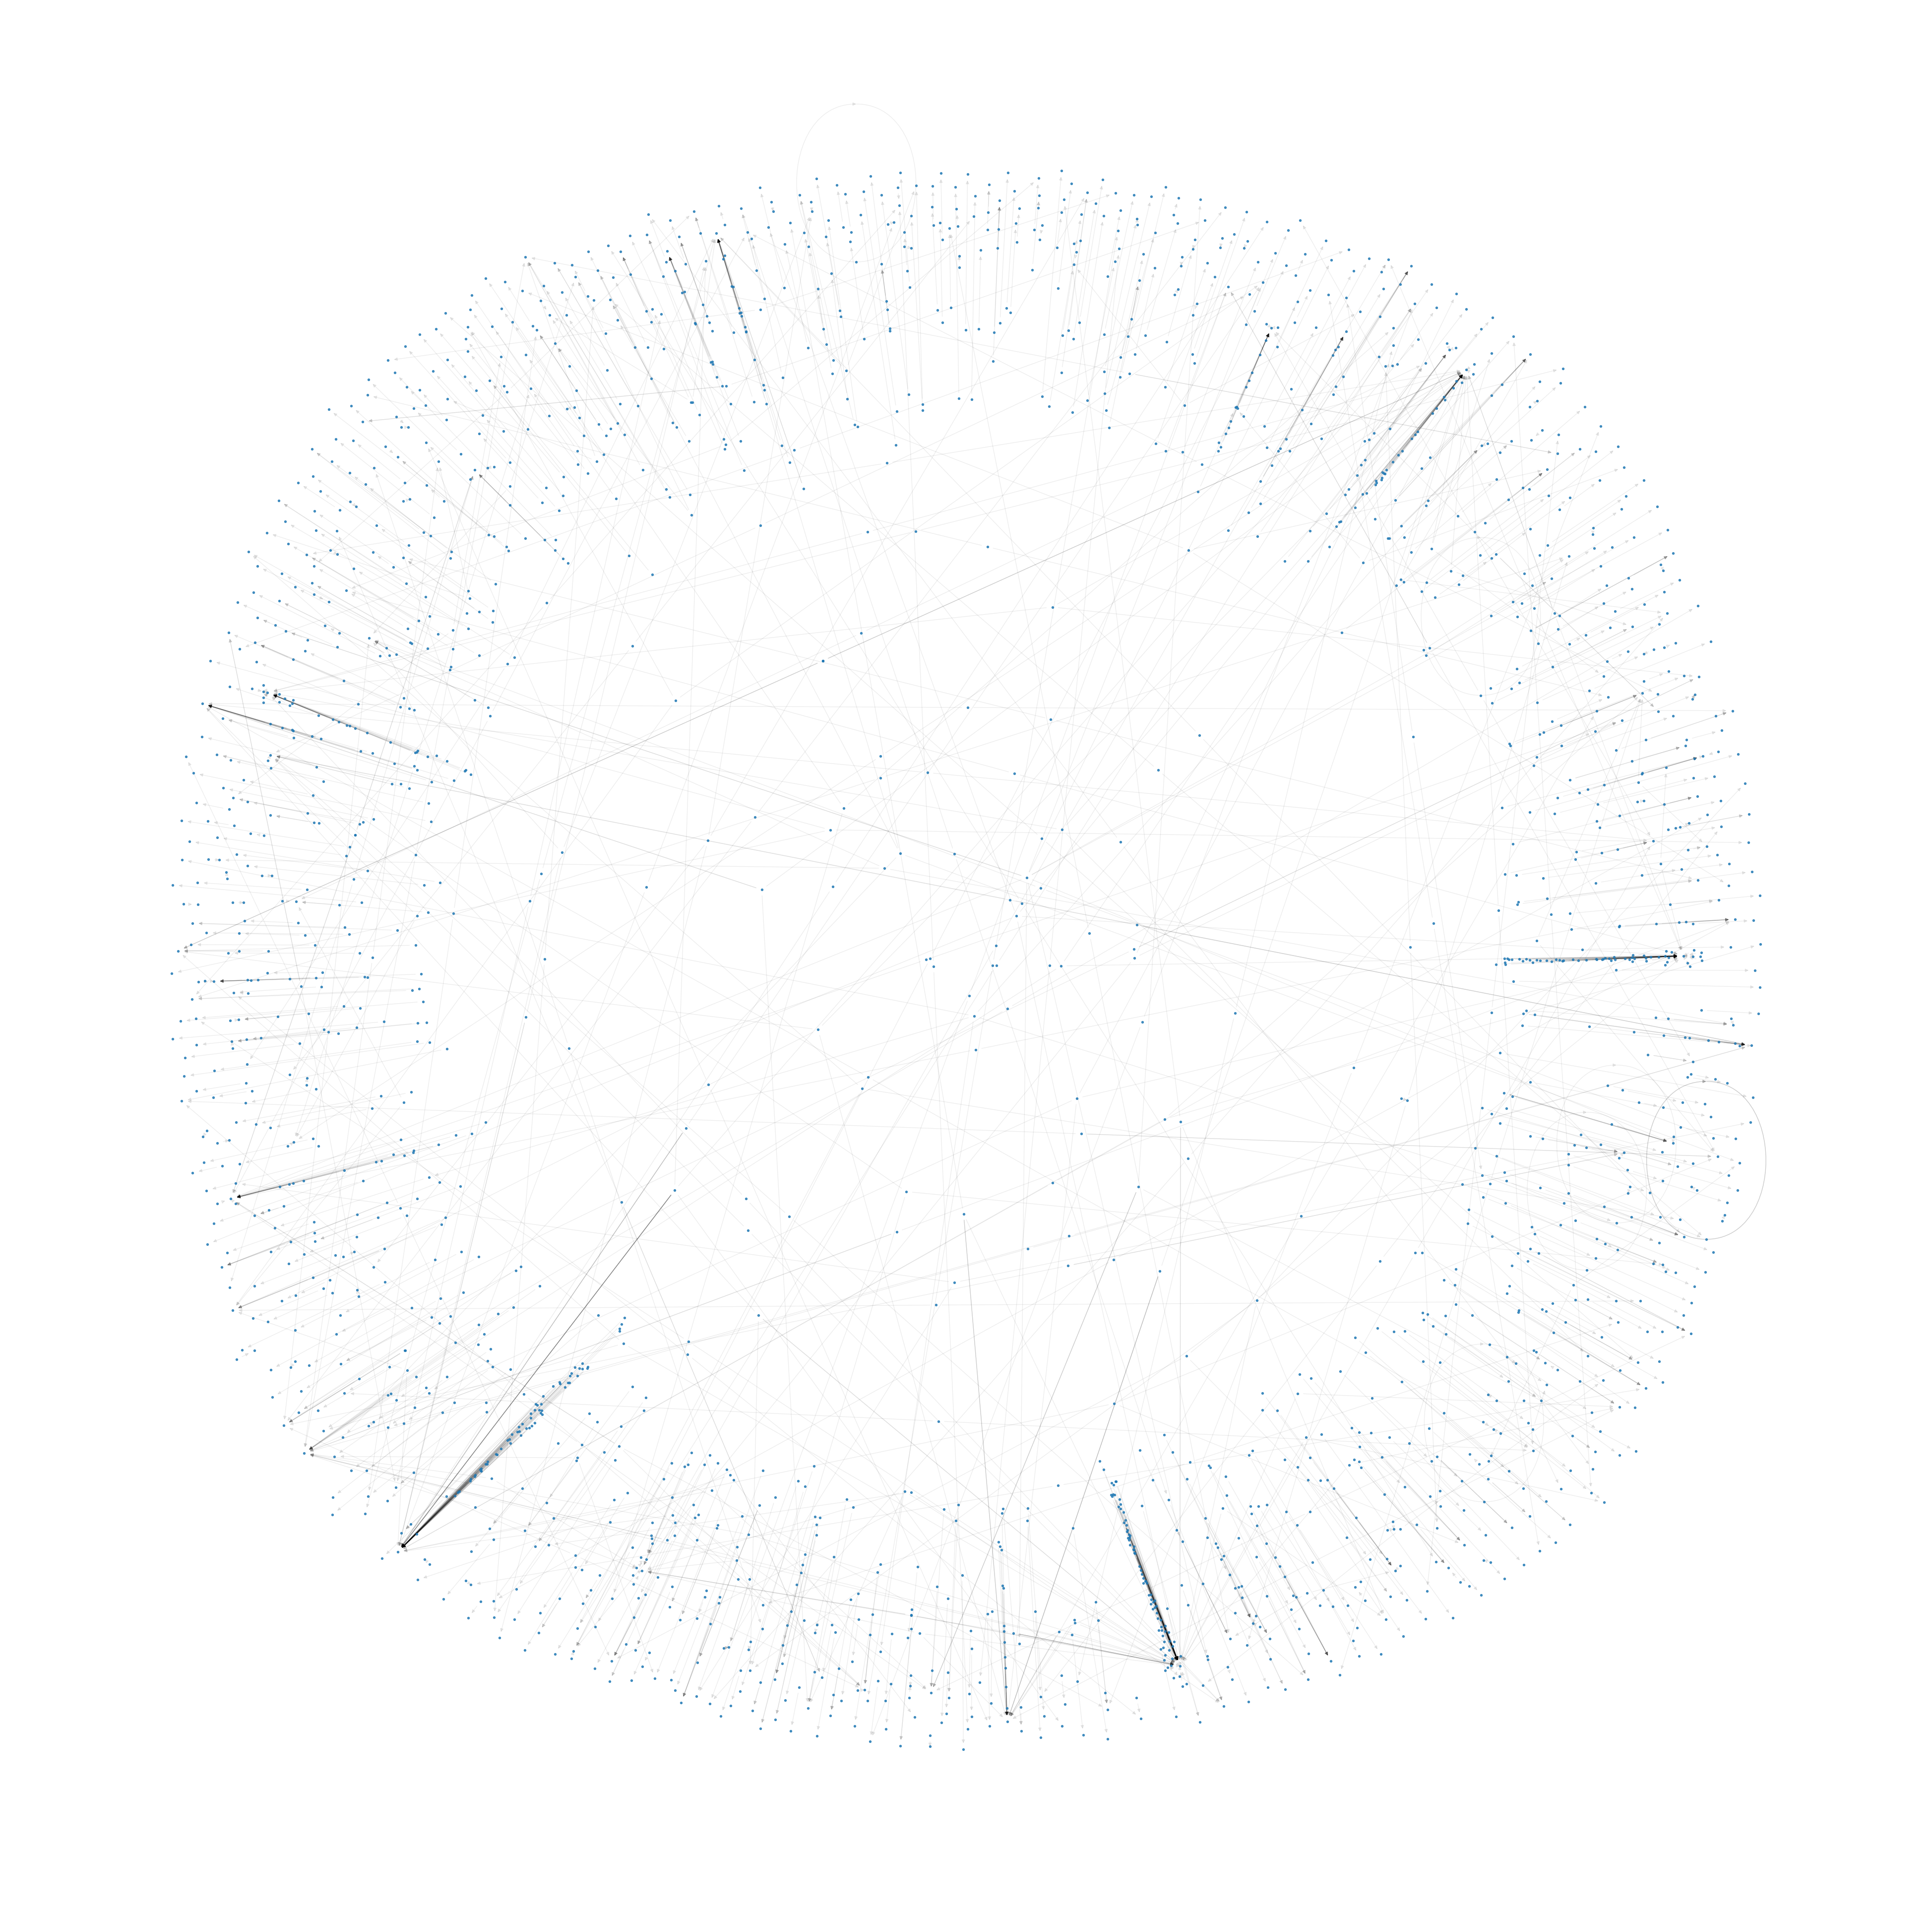

In [16]:
plt.figure(figsize=(50,50))
nx.draw_networkx_nodes(retweets_G, pos, node_size=8, alpha=0.8)
nx.draw_networkx_edges(retweets_G, pos, alpha=0.07)
plt.axis('off')
plt.show()